In [1]:
from z3 import *

x = Int('x')
y = Int('y')
solve(x > 2, y < 10, x + 2*y == 7)

[y = 0, x = 7]


In [2]:
x = Int('x')
y = Int('y')
print (simplify(x + y + 2*x + 3))
print (simplify(x < y + x + 2))
print (simplify(And(x + 1 >= 3, x**2 + x**2 + y**2 + 2 >= 5)))

3 + 3*x + y
Not(y <= -2)
And(x >= 2, 2*x**2 + y**2 >= 3)


In [3]:
x = Int('x')
y = Int('y')
print (x**2 + y**2 >= 1)
set_option(html_mode=False)
print (x**2 + y**2 >= 1)

x**2 + y**2 >= 1
x**2 + y**2 >= 1


In [4]:
x = Int('x')
y = Int('y')
n = x + y >= 3
print ("num args: ", n.num_args())
print ("children: ", n.children())
print ("1st child:", n.arg(0))
print ("2nd child:", n.arg(1))
print ("operator: ", n.decl())
print ("op name:  ", n.decl().name())

num args:  2
children:  [x + y, 3]
1st child: x + y
2nd child: 3
operator:  >=
op name:   >=


In [5]:
x = Real('x')
y = Real('y')
solve(x**2 + y**2 > 3, x**3 + y < 5)

[y = 2, x = 1/8]


In [6]:
x = Real('x')
y = Real('y')
solve(x**2 + y**2 == 3, x**3 == 2)

set_option(precision=30)
print ("Solving, and displaying result with 30 decimal places")
solve(x**2 + y**2 == 3, x**3 == 2)

[y = -1.1885280594?, x = 1.2599210498?]
Solving, and displaying result with 30 decimal places
[y = -1.188528059421316533710369365015?,
 x = 1.259921049894873164767210607278?]


In [7]:
print (1/3)
print (RealVal(1)/3)
print (Q(1,3))

x = Real('x')
print (x + 1/3)
print (x + Q(1,3))
print (x + "1/3")
print (x + 0.25)

0.3333333333333333
1/3
1/3
x + 3333333333333333/10000000000000000
x + 1/3
x + 1/3
x + 1/4


In [8]:
x = Real('x')
solve(3*x == 1)

set_option(rational_to_decimal=True)
solve(3*x == 1)

set_option(precision=30)
solve(3*x == 1)

[x = 1/3]
[x = 0.333333333333333333333333333333?]
[x = 0.333333333333333333333333333333?]


In [9]:
x = Real('x')
solve(x > 4, x < 0)

no solution


In [10]:
p = Bool('p')
q = Bool('q')
r = Bool('r')
solve(Implies(p, q), r == Not(q), Or(Not(p), r))      

[p = False, q = True, r = False]


In [11]:
p = Bool('p')
x = Real('x')
solve(Or(x < 5, x > 10), Or(p, x**2 == 2), Not(p))

[x = -1.414213562373095048801688724209?, p = False]


In [12]:
x = Int('x')
y = Int('y')

s = Solver()
print (s)

s.add(x > 10, y == x + 2)
print (s)
print ("Solving constraints in the solver s ...")
print (s.check())

print ("Create a new scope...")
s.push()
s.add(y < 11)
print (s)
print ("Solving updated set of constraints...")
print (s.check())

print ("Restoring state...")
s.pop()
print (s)
print ("Solving restored set of constraints...")
print (s.check())

[]
[x > 10, y == x + 2]
Solving constraints in the solver s ...
sat
Create a new scope...
[x > 10, y == x + 2, y < 11]
Solving updated set of constraints...
unsat
Restoring state...
[x > 10, y == x + 2]
Solving restored set of constraints...
sat


In [13]:
x = Real('x')
y = Real('y')
s = Solver()
s.add(x > 1, y > 1, Or(x + y > 3, x - y < 2))
print("asserted constraints...")
for c in s.assertions():
    print(c)

print(s.check())
print("statistics for the last check method...")
print(s.statistics())
# Traversing statistics
for k, v in s.statistics():
    print (k, " : ", v)

asserted constraints...
x > 1
y > 1
Or(x + y > 3, x - y < 2)
sat
statistics for the last check method...
(:arith-make-feasible 3
 :arith-max-columns   8
 :arith-max-rows      2
 :arith-upper         4
 :decisions           2
 :final-checks        1
 :max-memory          21.34
 :memory              20.36
 :mk-bool-var         4
 :mk-clause-binary    1
 :num-allocs          333384756
 :num-checks          1
 :rlimit-count        4782
 :time                0.02)
decisions  :  2
final checks  :  1
mk clause binary  :  1
num checks  :  1
mk bool var  :  4
arith-upper  :  4
arith-make-feasible  :  3
arith-max-columns  :  8
arith-max-rows  :  2
num allocs  :  333384756
rlimit count  :  4782
max memory  :  21.34
memory  :  20.36
time  :  0.017


In [14]:
x, y, z = Reals('x y z')
s = Solver()
s.add(x > 1, y > 1, x + y > 3, z - x < 10)
print (s.check())

m = s.model()
print ("x = %s" % m[x])

print ("traversing model...")
for d in m.decls():
    print ("%s = %s" % (d.name(), m[d]))


sat
x = 1.5
traversing model...
y = 2
x = 1.5
z = 0


In [15]:
x, y = Reals('x y')
# Put expression in sum-of-monomials form
t = simplify((x + y)**3, som=True)
print (t)
# Use power operator
t = simplify(t, mul_to_power=True)
print (t)

x*x*x + 3*x*x*y + 3*x*y*y + y*y*y
x**3 + 3*x**2*y + 3*x*y**2 + y**3


In [16]:
x, y = Reals('x y')
solve(x + 10000000000000000000000 == y, y > 20000000000000000)

print (Sqrt(2) + Sqrt(3))
print (simplify(Sqrt(2) + Sqrt(3)))
print (simplify(Sqrt(2) + Sqrt(3)).sexpr())
# The sexpr() method is available for any Z3 expression
print ((x + Sqrt(y) * 2).sexpr())

[y = 20000000000000001, x = -9999979999999999999999]
2**(0.5) + 3**(0.5)
3.146264369941972342329135065715?
(root-obj (+ (^ x 4) (* (- 10) (^ x 2)) 1) 4)
(+ x (* (^ y (/ 1.0 2.0)) 2.0))


In [17]:
p, q = Bools('p q')
demorgan = And(p, q) == Not(Or(Not(p), Not(q)))
print (demorgan)

def prove(f):
    s = Solver()
    s.add(Not(f))
    if s.check() == unsat:
        print ("proved")
    else:
        print ("failed to prove")

print ("Proving demorgan...")
prove(demorgan)

And(p, q) == Not(Or(Not(p), Not(q)))
Proving demorgan...
proved


In [18]:
# Create list [1, ..., 5] 
print ([ x + 1 for x in range(5) ])

# Create two lists containg 5 integer variables
X = [ Int('x%s' % i) for i in range(5) ]
Y = [ Int('y%s' % i) for i in range(5) ]
print (X)

# Create a list containing X[i]+Y[i]
X_plus_Y = [ X[i] + Y[i] for i in range(5) ]
print (X_plus_Y)

# Create a list containing X[i] > Y[i]
X_gt_Y = [ X[i] > Y[i] for i in range(5) ]
print (X_gt_Y)

print (And(X_gt_Y))

# Create a 3x3 "matrix" (list of lists) of integer variables
X = [ [ Int("x_%s_%s" % (i+1, j+1)) for j in range(3) ] 
      for i in range(3) ]
pp(X)

[1, 2, 3, 4, 5]
[x0, x1, x2, x3, x4]
[x0 + y0, x1 + y1, x2 + y2, x3 + y3, x4 + y4]
[x0 > y0, x1 > y1, x2 > y2, x3 > y3, x4 > y4]
And(x0 > y0, x1 > y1, x2 > y2, x3 > y3, x4 > y4)
[[x_1_1, x_1_2, x_1_3],
 [x_2_1, x_2_2, x_2_3],
 [x_3_1, x_3_2, x_3_3]]


In [19]:
X = IntVector('x', 5)
Y = RealVector('y', 5)
P = BoolVector('p', 5)
print (X)
print (Y)
print (P)
print ([ y**2 for y in Y ])
print (Sum([ y**2 for y in Y ]))

[x__0, x__1, x__2, x__3, x__4]
[y__0, y__1, y__2, y__3, y__4]
[p__0, p__1, p__2, p__3, p__4]
[y__0**2, y__1**2, y__2**2, y__3**2, y__4**2]
y__0**2 + y__1**2 + y__2**2 + y__3**2 + y__4**2


In [20]:
# Create 3 integer variables
dog, cat, mouse = Ints('dog cat mouse')
solve(dog >= 1,   # at least one dog
      cat >= 1,   # at least one cat
      mouse >= 1, # at least one mouse
      # we want to buy 100 animals
      dog + cat + mouse == 100,  
      # We have 100 dollars (10000 cents):
      #   dogs cost 15 dollars (1500 cents), 
      #   cats cost 1 dollar (100 cents), and 
      #   mice cost 25 cents 
      1500 * dog + 100 * cat + 25 * mouse == 10000)

[mouse = 56, cat = 41, dog = 3]


In [21]:
# 9x9 matrix of integer variables
X = [ [ Int("x_%s_%s" % (i+1, j+1)) for j in range(9) ] 
      for i in range(9) ]

# each cell contains a value in {1, ..., 9}
cells_c  = [ And(1 <= X[i][j], X[i][j] <= 9) 
             for i in range(9) for j in range(9) ]

# each row contains a digit at most once
rows_c   = [ Distinct(X[i]) for i in range(9) ]

# each column contains a digit at most once
cols_c   = [ Distinct([ X[i][j] for i in range(9) ]) 
             for j in range(9) ]

# each 3x3 square contains a digit at most once
sq_c     = [ Distinct([ X[3*i0 + i][3*j0 + j] 
                        for i in range(3) for j in range(3) ]) 
             for i0 in range(3) for j0 in range(3) ]

sudoku_c = cells_c + rows_c + cols_c + sq_c

# sudoku instance, we use '0' for empty cells
instance = ((0,0,0,0,9,4,0,3,0),
            (0,0,0,5,1,0,0,0,7),
            (0,8,9,0,0,0,0,4,0),
            (0,0,0,0,0,0,2,0,8),
            (0,6,0,2,0,1,0,5,0),
            (1,0,2,0,0,0,0,0,0),
            (0,7,0,0,0,0,5,2,0),
            (9,0,0,0,6,5,0,0,0),
            (0,4,0,9,7,0,0,0,0))

instance_c = [ If(instance[i][j] == 0, 
                  True, 
                  X[i][j] == instance[i][j]) 
               for i in range(9) for j in range(9) ]

s = Solver()
s.add(sudoku_c + instance_c)
if s.check() == sat:
    m = s.model()
    r = [ [ m.evaluate(X[i][j]) for j in range(9) ] 
          for i in range(9) ]
    print_matrix(r)
else:
    print ("failed to solve")

[[7, 1, 5, 8, 9, 4, 6, 3, 2],
 [2, 3, 4, 5, 1, 6, 8, 9, 7],
 [6, 8, 9, 7, 2, 3, 1, 4, 5],
 [4, 9, 3, 6, 5, 7, 2, 1, 8],
 [8, 6, 7, 2, 3, 1, 9, 5, 4],
 [1, 5, 2, 4, 8, 9, 7, 6, 3],
 [3, 7, 6, 1, 4, 8, 5, 2, 9],
 [9, 2, 8, 3, 6, 5, 4, 7, 1],
 [5, 4, 1, 9, 7, 2, 3, 8, 6]]


Trying to color 'peternson_3_coloring_graph' now (10 nodes, 17 edges)..
OK, found a solution with 3 colors
Here is the solution (in 0 seconds):
{0: 0, 1: 1, 2: 1, 3: 2, 4: 1, 5: 2, 6: 2, 7: 0, 8: 0, 9: 1}


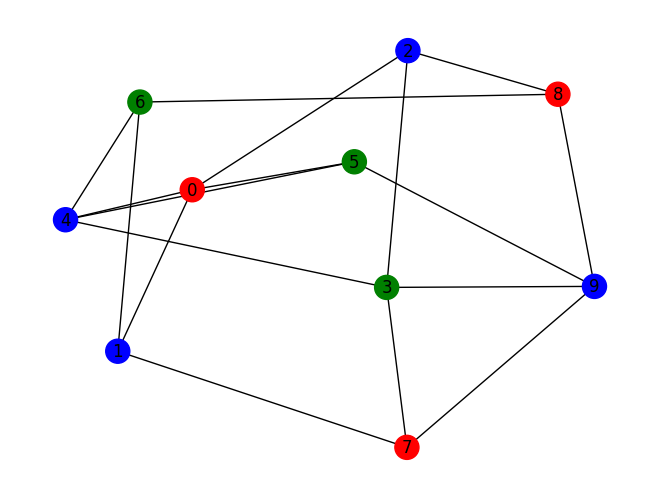

---


In [22]:
import sys
import time
import networkx as nx
import matplotlib.pyplot as plt
from z3 import *

def graph_coloring(graph):
    """Try to color graph with the least color possible"""
    s = Solver()
    nodes_colors = {node_name: Int(f'k{node_name}') for node_name in graph.nodes}

    # Test if the graph is colorable with increasing number of colors
    for i in range(1, graph.number_of_nodes() + 1):
        for node in graph.nodes:
            s.add(nodes_colors[node] >= 0, nodes_colors[node] < i)
            for neighbor in graph.neighbors(node):
                s.add(nodes_colors[node] != nodes_colors[neighbor])

        if s.check() == sat:
            print(f'OK, found a solution with {i} colors')
            m = s.model()
            return {name: m[color].as_long() for name, color in nodes_colors.items()}

        s.reset()
    raise Exception('Could not find a solution.')

def build_peternson_3_coloring_graph():
    """Build Petersen graph"""
    G = nx.Graph()
    edges = [
        (0, 2), (0, 1), (0, 5), (0, 4), (1, 6), (1, 7),
        (2, 3), (2, 8), (3, 4), (3, 7), (4, 5), (4, 6),
        (5, 9), (6, 8), (7, 9), (8, 9), (9, 3)
    ]

    G.add_nodes_from(range(10))
    G.add_edges_from(edges)

    return (G, 'peternson_3_coloring_graph')

Gs = [build_peternson_3_coloring_graph()]

color_map = ['red', 'blue', 'green', 'pink']

for G, name in Gs:
    print(f'Trying to color {name!r} now ({len(G.nodes)} nodes, {len(G.edges)} edges)..')
    t1 = time.perf_counter()
    solution = graph_coloring(G)
    t2 = time.perf_counter()

    print(f'Here is the solution (in {int(t2 - t1)} seconds):')
    if len(solution) < 20:
        print(solution)
    else:
        print('Too long, see the plot!')

    colors = [color_map[solution[node]] for node in G.nodes]
    nx.draw(G, with_labels=True, node_color=colors)
    plt.savefig(f'./graph_coloring_z3_{name}_colored.png')
    plt.show()
    print('---')


Hamiltonian cycle found for Dodecahedral graph


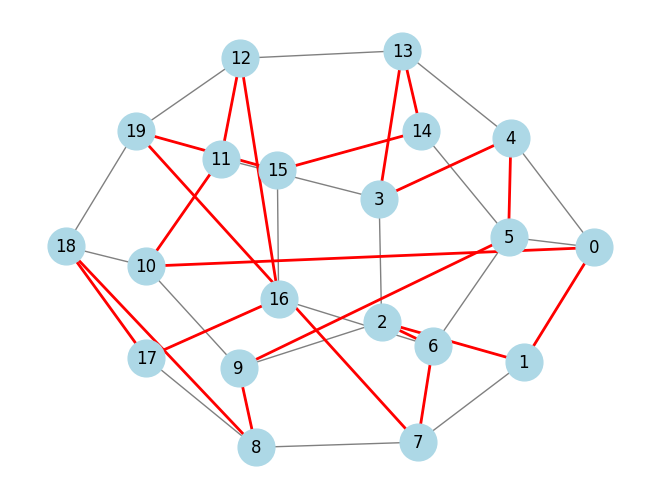

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
from z3 import Int, Solver, Or, sat

def gencon(gr):
    L = len(gr)
    cv = [Int(f'cv{i}') for i in range(L)]
    s = Solver()
    s.add(cv[0] == 0)
    for i in range(L):
        s.add(Or([cv[j] == (cv[i] + 1) % L for j in gr[i]]))
    return s, cv

def plot_hamiltonian_cycle(G, model, cv):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', edge_color='gray')

    # Extracting and highlighting the Hamiltonian cycle
    cycle_edges = [(model[cv[i]].as_long(), model[cv[(i + 1) % len(cv)]].as_long()) for i in range(len(cv))]
    nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color='red', width=2.0)

    plt.show()

import pprint
pp = pprint.PrettyPrinter(indent=4)

# Dodecahedral graph
grdodec = { 0: [1, 4, 5], 1: [0, 7, 2], 2: [1, 9, 3], 3: [2, 11, 4], 4: [3, 13, 0], 5: [0, 14, 6], 6: [5, 16, 7], 7: [6, 8, 1], 8: [7, 17, 9], 9: [8, 10, 2],10: [9, 18, 11],11: [10, 3, 12],12: [11, 19, 13],13: [12, 14, 4],14: [13, 15, 5],15: [14, 16, 19],16: [6, 17, 15],17: [16, 8, 18],18: [10, 19, 17],19: [18, 12, 15] }
# pp.pprint(grdodec)

sdodec, cv_dodec = gencon(grdodec)
result_dodec = sdodec.check()

# Herschel graph
grherschel = { 0: [1, 9, 10, 7],1: [0, 8, 2],2: [1, 9, 3],3: [2, 8, 4],4: [3, 9, 10, 5],5: [4, 8, 6],6: [5, 10, 7],7: [6, 8, 0],8: [1, 3, 5, 7],9: [2, 0, 4],10: [6, 4, 0] }
# pp.pprint(grherschel)
sherschel, cv_herschel = gencon(grherschel)
result_herschel = sherschel.check()

if result_dodec == sat:
    print("Hamiltonian cycle found for Dodecahedral graph")
    plot_hamiltonian_cycle(nx.Graph(grdodec), sdodec.model(), cv_dodec)

if result_herschel == sat:
    print("Hamiltonian cycle found for Herschel graph")
    plot_hamiltonian_cycle(nx.Graph(grherschel), sherschel.model(), cv_herschel)


[(0, 1), (0, 2), (1, 2)]


C:\Users\takat\AppData\Local\Temp\ipykernel_39892\1301845684.py:35: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color='red', width=2.0)


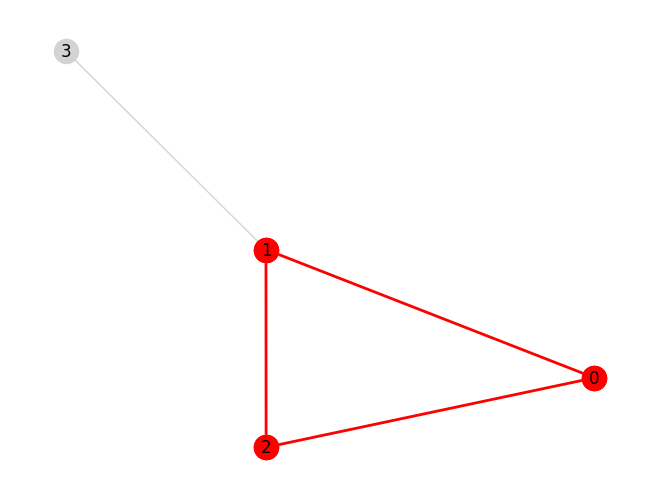

(True, [(0, 1), (0, 2), (1, 2)])
[(4, 10), (4, 5), (5, 6), (6, 10)]


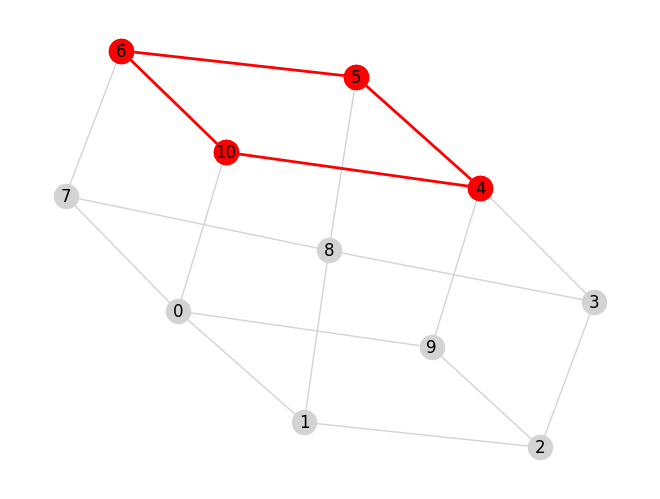

(True, [(4, 10), (4, 5), (5, 6), (6, 10)])


In [24]:
import networkx as nx
import matplotlib.pyplot as plt
from z3 import *

def has_n_node_cycle(gr, n=3):
    s = Solver()
    L = len(gr)

    edges = {(i, j): Bool(f"edge_{i}_{j}") for i in range(L) for j in gr[i] if i < j}

    for i in range(L):
        s.add(
            Or(
                Sum([If(edges.get((min(i, j), max(i, j)), False), 1, 0) for j in gr[i]]) == 2,
                Sum([If(edges.get((min(i, j), max(i, j)), False), 1, 0) for j in gr[i]]) == 0,
            )
        )

    s.add(Sum([If(e, 1, 0) for e in edges.values()]) == n)

    if s.check() == sat:
        m = s.model()
        cycle_edges = [edge for edge, value in edges.items() if is_true(m[value])]
        print(cycle_edges)

        G = nx.Graph()
        G.add_nodes_from(range(L))
        for i in gr:
            for j in gr[i]:
                G.add_edge(i, j)


        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='lightgrey', edge_color='lightgrey')
        nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color='red', width=2.0)
        nx.draw_networkx_nodes(G, pos, nodelist=[i for edge in cycle_edges for i in edge], node_color='red')

        plt.show()
        return True, cycle_edges
    else:
        return False, None
    
gr = {0: [1, 2], 1: [0, 2], 2: [0, 1], 3: [1]}
print(has_n_node_cycle(gr))
print(has_n_node_cycle(grherschel, n=4))

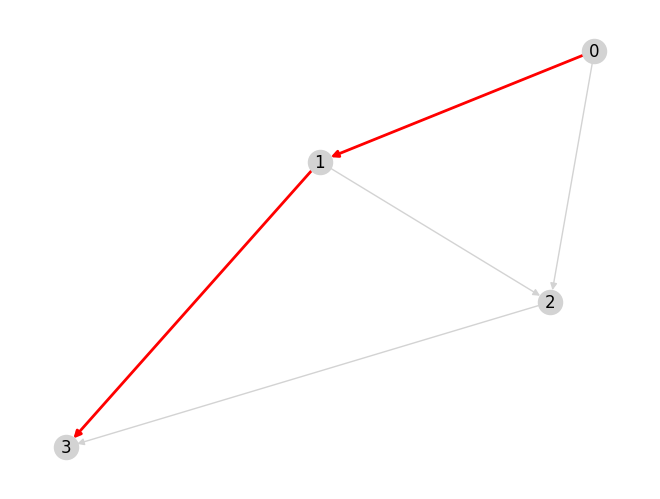

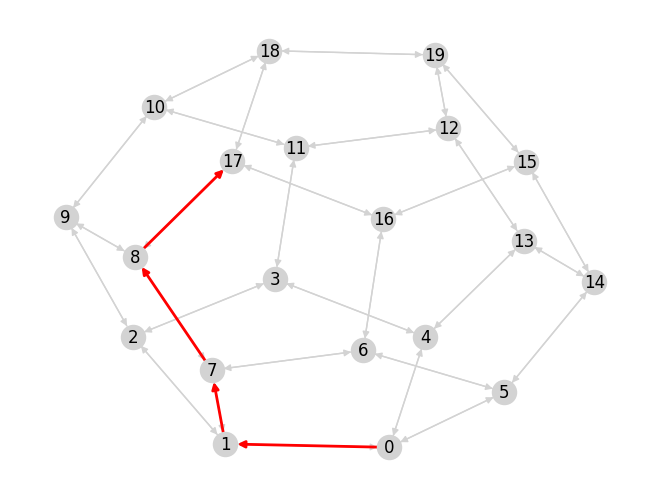

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
from z3 import *

def exists_path(gr, start, end, length=100):
    if start == end:
        return True, []  # Trivial case where start and end are the same

    s = Solver()
    L = len(gr)
    edges = {(i, j): Bool(f"edge_{i}_{j}") for i in gr for j in gr[i]}
    for i in gr:
        for j in gr[i]:
            edges[(j,i)] = Bool(f"edge_{j}_{i}")
    s.add(Or([edges[(start, j)] for j in gr[start]]))
    s.add(Or([edges[(i, end)] for i in gr if end in gr[i]]))

    for i in gr:
        if i != start and i != end:
            incoming_edges = Or(False,Or([edges[(j, i)] for j in gr if i in gr[j]]))
            outgoing_edges = Or(False,Or([edges[(i, j)] for j in gr[i]]))
            s.add(Implies(incoming_edges, outgoing_edges))
        elif i == start:
            s.add(Sum([If(edges.get((j, i), False), 1, 0) for j in gr if i in gr[j]]) == 0)
            s.add(Sum([If(edges.get((i, j), False), 1, 0) for j in gr[i]]) == 1)
        elif i == end:
            s.add(Sum([If(edges.get((j, i), False), 1, 0) for j in gr if i in gr[j]]) == 1)
            s.add(Sum([If(edges.get((i, j), False), 1, 0) for j in gr[i]]) == 0)
    for i in gr:
        s.add(Sum([If(edges.get((j, i), False), 1, 0) for j in gr if i in gr[j]]) <= 1)
        s.add(Sum([If(edges.get((i, j), False), 1, 0) for j in gr[i]]) <= 1)

    s.add(Sum([If(edges.get(i, 0), 1, 0) for i in edges] )<= length)

    if s.check() == sat:
        m = s.model()
        # print(m)
        path_edges = [edge for edge, value in edges.items() if is_true(m[value])]
        # print(path_edges)

        # Plot the graph and highlight the path
        G = nx.DiGraph()
        G.add_nodes_from(gr)
        for i in gr:
            for j in gr[i]:
                G.add_edge(i, j)

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='lightgrey', edge_color='lightgrey', arrows=True)
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.0, arrows=True)
        
        plt.show()
        return True, path_edges
    else:
        return False, []

# Example usage
gr = {0: [1, 2], 1: [2, 3], 2: [3], 3: []}
start_node = 0
end_node = 3
exists = False
length = 1
while not exists:
    exists, path = exists_path(gr, start_node, end_node, length)
    length += 1
# print(f"Path exists: {exists}, Path: {path}")
exists = False
length = 1
while not exists:
    exists, path = exists_path( grdodec, 0, 17,length )
    length += 1


In [6]:
N = 30
Q = [ Int('Q_%i' % (i + 1)) for i in range(N) ]

# Each queen is in a column {1, ... N }
val_c = [ And(1 <= Q[i], Q[i] <= N) for i in range(N) ]

# At most one queen per column
col_c = [ Distinct(Q) ]

# Diagonal constraint
diag_c = [ If(i == j, 
            True,
            And(Q[i] - Q[j] != i - j, Q[i] - Q[j] != j - i)) 
        for i in range(N) for j in range(i) ]

# s.add(val_c + col_c + diag_c)
time1 = time.time()
solve(val_c + col_c + diag_c)
time2 = time.time()

[Q_3 = 11,
 Q_9 = 16,
 Q_20 = 4,
 Q_10 = 6,
 Q_8 = 27,
 Q_23 = 29,
 Q_14 = 26,
 Q_13 = 2,
 Q_21 = 20,
 Q_12 = 17,
 Q_1 = 12,
 Q_7 = 23,
 Q_30 = 7,
 Q_26 = 30,
 Q_29 = 19,
 Q_6 = 21,
 Q_22 = 25,
 Q_24 = 10,
 Q_5 = 15,
 Q_16 = 1,
 Q_2 = 3,
 Q_15 = 28,
 Q_27 = 18,
 Q_28 = 22,
 Q_17 = 9,
 Q_25 = 13,
 Q_18 = 5,
 Q_4 = 24,
 Q_19 = 14,
 Q_11 = 8]


In [4]:
# We know each queen must be in a different row.
# So, we represent each queen by a single integer: the column position
# s = Solver()
import time
for i in range(6, 20):
   N = i
   Q = [ Int('Q_%i' % (i + 1)) for i in range(N) ]

   # Each queen is in a column {1, ... N }
   val_c = [ And(1 <= Q[i], Q[i] <= N) for i in range(N) ]

   # At most one queen per column
   col_c = [ Distinct(Q) ]

   # Diagonal constraint
   diag_c = [ If(i == j, 
               True,
               And(Q[i] - Q[j] != i - j, Q[i] - Q[j] != j - i)) 
            for i in range(N) for j in range(i) ]

   # s.add(val_c + col_c + diag_c)
   time1 = time.time()
   solve(val_c + col_c + diag_c)
   time2 = time.time()
   print("Time for ", N, " queens: ", time2 - time1)

[Q_4 = 1, Q_3 = 6, Q_1 = 2, Q_2 = 4, Q_6 = 5, Q_5 = 3]
Time for  6  queens:  0.015801191329956055
[Q_6 = 5,
 Q_3 = 6,
 Q_1 = 2,
 Q_7 = 7,
 Q_2 = 4,
 Q_5 = 3,
 Q_4 = 1]
Time for  7  queens:  0.022112607955932617
[Q_3 = 2,
 Q_1 = 3,
 Q_7 = 8,
 Q_8 = 5,
 Q_5 = 1,
 Q_4 = 7,
 Q_2 = 6,
 Q_6 = 4]
Time for  8  queens:  0.018927574157714844
[Q_3 = 7,
 Q_1 = 2,
 Q_7 = 9,
 Q_9 = 8,
 Q_8 = 6,
 Q_5 = 1,
 Q_4 = 4,
 Q_2 = 5,
 Q_6 = 3]
Time for  9  queens:  0.01889514923095703
[Q_3 = 9,
 Q_1 = 5,
 Q_7 = 10,
 Q_9 = 1,
 Q_10 = 4,
 Q_5 = 6,
 Q_4 = 3,
 Q_8 = 8,
 Q_2 = 7,
 Q_6 = 2]
Time for  10  queens:  0.04439353942871094
[Q_3 = 11,
 Q_1 = 3,
 Q_7 = 1,
 Q_9 = 9,
 Q_10 = 5,
 Q_5 = 6,
 Q_4 = 2,
 Q_8 = 4,
 Q_11 = 8,
 Q_2 = 7,
 Q_6 = 10]
Time for  11  queens:  0.04421567916870117
[Q_3 = 11,
 Q_1 = 4,
 Q_7 = 9,
 Q_9 = 2,
 Q_10 = 5,
 Q_5 = 1,
 Q_4 = 3,
 Q_8 = 12,
 Q_11 = 8,
 Q_2 = 7,
 Q_6 = 6,
 Q_12 = 10]
Time for  12  queens:  0.04213666915893555
[Q_3 = 9,
 Q_9 = 4,
 Q_1 = 3,
 Q_10 = 8,
 Q_7 = 10,
 Q_5 = 1,
 

In [50]:
x = Int('x')
y = Real('y')
print ((x + 1).sort())
print ((y + 1).sort())
print ((x >= 2).sort())

Int
Real
Bool


In [64]:
x, y = Ints('x y')
print (eq(x + y, x + y))
print (eq(x + y, y + x))
n = x + y
print (eq(n, x + y))
# x2 is eq to x
x2 = Int('x') 
print (eq(x, x2))
# the integer variable x is not equal to 
# the real variable x
print (eq(Int('x'), Real('x')))

True
False
True
True
False


In [27]:
x = Int('x')
print ("is expression: ", is_expr(x))
n = x + 1
print ("is application:", is_app(n))
print ("decl:          ", n.decl())
print ("num args:      ", n.num_args())
for i in range(n.num_args()):
    print ("arg(", i, ") ->", n.arg(i))

is expression:  True
is application: True
decl:           +
num args:       2
arg( 0 ) -> x
arg( 1 ) -> 1


In [53]:
x, y = Ints('x y')
f    = Function('f', IntSort(), IntSort(), IntSort())
g    = Function('g', IntSort(), IntSort())
n    = f(f(g(x), g(g(x))), g(g(y)))
print (n)
# substitute g(g(x)) with y and g(y) with x + 1
print (substitute(n, (g(g(x)), y), (g(y), x + 1)))

f(f(g(x), g(g(x))), g(g(y)))
f(f(g(x), y), g(x + 1))


In [28]:
# Use I as an alias for IntSort()
I = IntSort()
# A is an array from integer to integer
A = Array('A', I, I)
x = Int('x')
print (A[x])
print (Select(A, x))
print (Store(A, x, 10))
print (simplify(Select(Store(A, 2, x+1), 2)))

A[x]
A[x]
Store(A, x, 10)
1 + x


In [54]:
# # We want an array with 3 elements.
# # 1. Bad solution
# X = Array('x', IntSort(), IntSort())
# # Example using the array
# print (X[0] + X[1] + X[2] >=0)

# 2. More efficient solution
X = IntVector('x', 3)
print (X[0] + X[1] + X[2] >= 0)
print (Sum(X) >= 0)

x__0 + x__1 + x__2 >= 0
x__0 + x__1 + x__2 >= 0


In [30]:
A = Array('A', IntSort(), IntSort())
x, y = Ints('x y')
solve(A[x] == x, Store(A, x, y) == A)

[x = 3, A = Store(K(Int, 2), 3, 3), y = 3]


In [55]:
# Declare a List of integers
List = Datatype('List')
# Constructor cons: (Int, List) -> List
List.declare('cons', ('car', IntSort()), ('cdr', List))
# Constructor nil: List
List.declare('nil')
# Create the datatype
List = List.create()
print (is_sort(List))
cons = List.cons
car  = List.car
cdr  = List.cdr
nil  = List.nil
# cons, car and cdr are function declarations, and nil a constant
print (is_func_decl(cons))
print (is_expr(nil))

l1 = cons(10, cons(20, nil))
print (l1)
print (simplify(cdr(l1)))
print (simplify(car(l1)))
print (simplify(l1 == nil))

True
True
True
cons(10, cons(20, nil))
cons(20, nil)
10
False


In [48]:
from z3 import *

example = """

(declare-datatypes () ((Sort
(|SortInt| )
(|SortExp| )
(|SortKItem| )
(|SortKLabel| )
(|SortK| )
)))

;(declare-fun <=Sort (Sort Sort) Bool)
;(declare-fun <=SortSyntax (Sort Sort) Bool)


(declare-const |FreshVarSort_6_8_6_36_#KRewrite| Sort)
(declare-const |VarA| Sort)
(declare-const |VarB| Sort)
(declare-const |VarC| Sort)
(declare-datatypes() ((SolutionVariables (SolVars (|Sol_VarA| Sort) (|Sol_VarB| Sort) (|Sol_VarC| Sort) ))))
(declare-datatypes() ((Solution (Sol (vars SolutionVariables) (|Sol_FreshVarSort_6_8_6_36_#KRewrite| Sort) ))))
(define-fun theSolution () Solution (Sol (SolVars |VarA| |VarB| |VarC| ) |FreshVarSort_6_8_6_36_#KRewrite| ))
(define-fun lt ((s1 Solution) (s2 Solution)) Bool (and true (<=SortSyntax (|Sol_VarA| (vars s1)) (|Sol_VarA| (vars s2))) (<=SortSyntax (|Sol_VarB| (vars s1)) (|Sol_VarB| (vars s2))) (<=SortSyntax (|Sol_VarC| (vars s1)) (|Sol_VarC| (vars s2)))  (distinct (vars s1) (vars s2))))
(assert (and true (distinct (|Sol_FreshVarSort_6_8_6_36_#KRewrite| theSolution) |SortKLabel|) ))
(define-fun |constraint4_SortExp| ((s Solution)) Bool (and true (<=Sort (|Sol_VarA| (vars s)) |SortExp|) ))
(define-fun |constraint6_SortExp| ((s Solution)) Bool (and true (<=Sort (|Sol_VarB| (vars s)) |SortExp|) ))
(define-fun |constraint3_SortExp| ((s Solution)) Bool (and true (<=Sort |SortExp| |SortExp|) (|constraint4_SortExp| s) (|constraint6_SortExp| s) ))
(define-fun |constraint8_SortExp| ((s Solution)) Bool (and true (<=Sort (|Sol_VarC| (vars s)) |SortExp|) ))
(define-fun |constraint2_(Sol_FreshVarSort_6_8_6_36_#KRewrite s)| ((s Solution)) Bool (and true (<=Sort |SortExp| (|Sol_FreshVarSort_6_8_6_36_#KRewrite| s)) (|constraint3_SortExp| s) (|constraint8_SortExp| s) ))
(define-fun |constraint12_SortInt| ((s Solution)) Bool (and true (<=Sort (|Sol_VarA| (vars s)) |SortInt|) ))
(define-fun |constraint14_SortInt| ((s Solution)) Bool (and true (<=Sort (|Sol_VarB| (vars s)) |SortInt|) ))
(define-fun |constraint11_SortInt| ((s Solution)) Bool (and true (<=Sort |SortInt| |SortInt|) (|constraint12_SortInt| s) (|constraint14_SortInt| s) ))
(define-fun |constraint16_SortInt| ((s Solution)) Bool (and true (<=Sort (|Sol_VarC| (vars s)) |SortInt|) ))
(define-fun |constraint10_(Sol_FreshVarSort_6_8_6_36_#KRewrite s)| ((s Solution)) Bool (and true (<=Sort |SortInt| (|Sol_FreshVarSort_6_8_6_36_#KRewrite| s)) (|constraint11_SortInt| s) (|constraint16_SortInt| s) ))
(define-fun |constraint1_Sort#RuleBody| ((s Solution)) Bool (and true (= (|Sol_FreshVarSort_6_8_6_36_#KRewrite| s) |SortK|) (|constraint2_(Sol_FreshVarSort_6_8_6_36_#KRewrite s)| s) (|constraint10_(Sol_FreshVarSort_6_8_6_36_#KRewrite s)| s) ))
(define-fun |constraint0_Sort#RuleContent| ((s Solution)) Bool (and true (|constraint1_Sort#RuleBody| s) ))
(define-fun |constraint21_SortExp| ((s Solution)) Bool (and true (<=Sort |SortExp| |SortExp|) (|constraint6_SortExp| s) (|constraint8_SortExp| s) ))
(define-fun |constraint20_(Sol_FreshVarSort_6_8_6_36_#KRewrite s)| ((s Solution)) Bool (and true (<=Sort |SortExp| (|Sol_FreshVarSort_6_8_6_36_#KRewrite| s)) (|constraint4_SortExp| s) (|constraint21_SortExp| s) ))
(define-fun |constraint19_Sort#RuleBody| ((s Solution)) Bool (and true (= (|Sol_FreshVarSort_6_8_6_36_#KRewrite| s) |SortK|) (|constraint20_(Sol_FreshVarSort_6_8_6_36_#KRewrite s)| s) (|constraint10_(Sol_FreshVarSort_6_8_6_36_#KRewrite s)| s) ))
(define-fun |constraint18_Sort#RuleContent| ((s Solution)) Bool (and true (|constraint19_Sort#RuleBody| s) ))
(define-fun amb0 ((s Solution)) Bool (or (|constraint0_Sort#RuleContent| s) (|constraint18_Sort#RuleContent| s) ))

(assert (amb0 theSolution))
;(assert (not (exists ((s Solution)) (and (lt theSolution s) (amb0 s) (distinct (|Sol_FreshVarSort_6_8_6_36_#KRewrite| s) |SortKLabel|) ))))
(assert (not (exists ((var SolutionVariables) (s Sort)) (and (lt theSolution (Sol var s)) (amb0 (Sol var s)) (distinct s |SortKLabel|) ))))
(check-sat)
(get-model)
;(assert (or false (distinct |VarA| |SortInt|) (distinct |VarB| |SortInt|) (distinct |VarC| |SortInt|) ))
;(check-sat)
"""

In [49]:

Sort = DatatypeSort("Sort")
leSort = PropagateFunction("<=Sort", Sort, Sort, BoolSort())
leSortSyntax = PropagateFunction("<=SortSyntax", Sort, Sort, BoolSort())
fmls = parse_smt2_string(example, decls={"<=Sort":leSort, "<=SortSyntax":leSortSyntax})


In [50]:

[SortInt, SortExp, SortKItem, SortKLabel, SortK] = [Sort.constructor(i) for i in range(Sort.num_constructors())]


leSortTable = [(SortKItem, SortK),
               (SortExp, SortKItem),
               (SortInt, SortExp)]
my_leSortTable = [
                    (SortKItem, SortKItem),
                    (SortKItem, SortK),
                    (SortK, SortK),
                    (SortExp, SortKItem),
                    (SortExp, SortK),
                    (SortExp, SortExp),
                    (SortInt, SortKItem),
                    (SortInt, SortK),
                    (SortInt, SortInt),
                    (SortInt, SortExp),
                    (SortKLabel, SortKLabel)]

leSortSyntaxTable = [(SortKItem, SortK),
                     (SortExp, SortKItem),
                     (SortInt, SortExp)]

my_leSortSyntaxTable = [
                    (SortKItem, SortKItem),
                    (SortKItem, SortK),
                    (SortK, SortK),
                    (SortExp, SortKItem),
                    (SortExp, SortK),
                    (SortExp, SortExp),
                    (SortInt, SortKItem),
                    (SortInt, SortK),
                    (SortInt, SortInt),
                    (SortInt, SortExp),
                    (SortKLabel, SortKLabel)
                    ]
constructors = {con() for con in [SortInt, SortExp, SortKItem, SortKLabel, SortK]}


# Compute the reflexive transitive closure of a binary relation over constructors.

def rtc(constructors, bin):
    step = { k : set([]) for k in constructors }
    for k, v in bin:
        step[k()] |= { v() }
    t = { k : {k} for k in constructors }
    print(step)
    change = True
    while change:
        change = False
        for k, vs in t.items():
            sz0 = len(vs)
            vs |= { w for v in vs for w in step[v] }
            if len(vs) > sz0:
                change = True
    print(t)
    return t


In [51]:
rtc_leSortSyntaxTable = rtc(constructors,leSortSyntaxTable )
rtc_leSortTable = rtc(constructors,leSortTable )

{SortKItem: {SortK}, SortK: set(), SortExp: {SortKItem}, SortInt: {SortExp}, SortKLabel: set()}
{SortKItem: {SortKItem, SortK}, SortK: {SortK}, SortExp: {SortKItem, SortK, SortExp}, SortInt: {SortKItem, SortK, SortInt, SortExp}, SortKLabel: {SortKLabel}}
{SortKItem: {SortK}, SortK: set(), SortExp: {SortKItem}, SortInt: {SortExp}, SortKLabel: set()}
{SortKItem: {SortKItem, SortK}, SortK: {SortK}, SortExp: {SortKItem, SortK, SortExp}, SortInt: {SortKItem, SortK, SortInt, SortExp}, SortKLabel: {SortKLabel}}


In [52]:
pairs_leSortTable = []
for k, v in rtc_leSortTable.items():
    print(k, v)
    for w in v:
        pairs_leSortTable.append((k, w))
pairs_leSortSyntaxTable = []
for k, v in rtc_leSortSyntaxTable.items():
    print(k, v)
    for w in v:
        pairs_leSortSyntaxTable.append((k, w))

SortKItem {SortKItem, SortK}
SortK {SortK}
SortExp {SortKItem, SortK, SortExp}
SortInt {SortKItem, SortK, SortInt, SortExp}
SortKLabel {SortKLabel}
SortKItem {SortKItem, SortK}
SortK {SortK}
SortExp {SortKItem, SortK, SortExp}
SortInt {SortKItem, SortK, SortInt, SortExp}
SortKLabel {SortKLabel}


In [53]:
leSortTable

[(SortKItem, SortK), (SortExp, SortKItem), (SortInt, SortExp)]

In [54]:
pairs_leSortSyntaxTable

[(SortKItem, SortKItem),
 (SortKItem, SortK),
 (SortK, SortK),
 (SortExp, SortKItem),
 (SortExp, SortK),
 (SortExp, SortExp),
 (SortInt, SortKItem),
 (SortInt, SortK),
 (SortInt, SortInt),
 (SortInt, SortExp),
 (SortKLabel, SortKLabel)]

In [55]:
class Node:
    def __init__(self, a):
        self.term = a
        self.id = a.get_id()
        self.root = self
        self.size = 1
        self.value = None

    def __eq__(self, other):
        return self.id == other.id

    def __ne__(self, other):
        return self.id != other.id
    
    def to_string(self):
        return f"{self.term} -> r:{self.root.term}"

    def __str__(self):
        return self.to_string()

class UnionFind:
    def __init__(self, trail):
        self._nodes = {}
        self.trail = trail

    def node(self, a):
        if a in self._nodes:
            return self._nodes[a]
        n = Node(a)
        self._nodes[a] = n
        def undo():
            del self._nodes[a]
        self.trail.append(undo)
        return n

    def merge(self, a, b):
        a = self.node(a)
        b = self.node(b)
        a = self.find(a)
        b = self.find(b)
        if a == b:
            return
        if a.size < b.size:
            a, b = b, a
        if a.value is not None and b.value is not None:
            print("Merging two values", a, a.value, b, b.value)
            os._exit()
        value = a.value
        if b.value is not None:
            value = b.value        
        old_root = b.root
        old_asize = a.size
        old_bvalue = b.value
        old_avalue = a.value
        b.root = a.root
        b.value = value
        a.value = value
        a.size += b.size
        def undo():
            b.root = old_root
            a.size = old_asize
            b.value = old_bvalue
            a.value = old_avalue
        self.trail.append(undo)

    # skip path compression to keep the example basic
    def find(self, a):
        assert isinstance(a, Node)
        root = a.root
        while root != root.root:
            root = root.root
        return root

    def set_value(self, a):
        n = self.find(self.node(a))
        if n.value is not None:
            return
        def undo():
            n.value = None
        n.value = a
        self.trail.append(undo)

    def get_value(self, a):
        return self.find(self.node(a)).value        

    def root_term(self, a):
        return self.find(self.node(a)).term

    def __str__(self):
        return self.to_string()

    def __repr__(self):
        return self.to_string()

    def to_string(self):
        return "\n".join([n.to_string() for t, n in self._nodes.items()])
        

In [60]:
class TC(UserPropagateBase):
    def __init__(self, s=None, ctx=None):
        UserPropagateBase.__init__(self, s, ctx)
        self.trail = []
        self.lim   = []
        self.add_fixed(lambda x, v : self._fixed(x, v))
        self.add_final(lambda : self._final())
        self.add_eq(lambda x, y : self._eq(x, y))
        self.add_created(lambda t : self._created(t))
        self.uf = UnionFind(self.trail)
        for v in constructors:
            self.uf.set_value(v)
        self.first = True
        self._fixed_le = []
        self._fixed_le_syntax = []
        print(self._fixed_le)
        self._fixed_le_table = rtc(constructors, leSortTable)
        self._fixed_le_syntax_table = rtc(constructors, leSortSyntaxTable)

    def push(self):
        self.lim += [len(self.trail)]

    def pop(self, n):
        head = self.lim[len(self.lim) - n]
        while len(self.trail) > head:
            self.trail[-1]()
            self.trail.pop(-1)
        self.lim = self.lim[0:len(self.lim)-n]

    def fresh(self, new_ctx):
        return TC(ctx=new_ctx)
    
    def _fixed(self, x, v):        
        print("fixed: ", x, " := ", v)
        if x.decl().eq(leSort):
            print("infixed")
            print(x)
            self._fixed_trail(x, v, self._fixed_le_table, self._fixed_le)
        elif x.decl().eq(leSortSyntax):
            self._fixed_trail(x, v, self._fixed_le_syntax_table, self._fixed_le_syntax)

    def _fixed_trail(self, x, v, table, trail):
        if self.check_conflict(x, v, table):
            return
        trail.append((x,v))
        def undo():
            trail.pop(-1)
        self.trail.append(undo)
    
    
    def _created(self, t):
        print("Created", t)
        self.add(t)
        x, y = t.arg(0), t.arg(1)
        self.add(x)
        self.add(y)
        if self.first:
            self.first = False
            for v in constructors:
                print("Here")
                self.add(v)
    
    def _eq(self, x, y):
        print("equated: ",x, " = ", y)
        self.uf.merge(x, y)
    
    def _final(self):
        print("Final")
        print(self._fixed_le)
        self.check_rtc(self._fixed_le, self._fixed_le_table)
        self.check_rtc(self._fixed_le_syntax, self._fixed_le_syntax_table)

    #
    # Check if assignment f := v triggers a conflict with respect
    # to reflexive, transitive closure relation, <=Sort or <=SortSyntax
    # Look up the values of the two arguments a, b in the
    # union-find structure.
    # For
    #  <=Sort(a,b) := True, check that b is reachable from a
    #  <=Sort(a,b) := False, check that b is _not_ reachable from a
    # The process is similar for <=SortSyntax
    # 
    def check_conflict(self, f, v, rtc, is_final = False):
        a, b = f.arg(0), f.arg(1)
        va, vb = self.uf.get_value(a), self.uf.get_value(b)
        if va is None or vb is None:
            if is_final:
                print("Unassigned", a, va, b, vb)
                os._exit(1)
            return False
        if is_true(v):
            # print(vb)
            # print(rtc[va])
            if vb not in rtc[va]:
                print("VB:")
                print(vb)
                print("VA:")
                print(va)
                print(rtc[va])
                print("Conflict: asserted relation should be included in TC", f, v, a, va, b, vb)
                self.conflict(deps = [f], eqs = [(a, va), (b, vb)])
                return True
            else:
                # print("else")
                return False
        elif is_false(v):
            if vb in rtc[va]:
                print("Conflict: asserted negated relation should not be included in TC", f, v, a, va, b, vb)
                self.conflict(deps = [f], eqs = [(a, va), (b, vb)])
                return True
            else:
                return False
        else:
            print("Unrecognized value", v)
            assert(False)
        
    def check_rtc(self, asserted, rtc):
        print(asserted)
        for (f, v) in asserted:            
            if self.check_conflict(f, v, rtc, is_final = True):
                return

    def get_uf(self):
        return self.uf

In [61]:
s = Solver()
b = TC(s)
for (a,b) in leSortTable:
    s.add(leSort(a(),b()))

for (a,b) in leSortSyntaxTable:
    s.add(leSortSyntax(a(), b()))
    
# for (a,b) in my_leSortTable:
#     s.add(leSort(a(),b()))

# for (a,b) in my_leSortSyntaxTable:
#     s.add(leSortSyntax(a(), b()))
    

[]
{SortKItem: {SortK}, SortK: set(), SortExp: {SortKItem}, SortInt: {SortExp}, SortKLabel: set()}
{SortKItem: {SortKItem, SortK}, SortK: {SortK}, SortExp: {SortKItem, SortK, SortExp}, SortInt: {SortKItem, SortK, SortInt, SortExp}, SortKLabel: {SortKLabel}}
{SortKItem: {SortK}, SortK: set(), SortExp: {SortKItem}, SortInt: {SortExp}, SortKLabel: set()}
{SortKItem: {SortKItem, SortK}, SortK: {SortK}, SortExp: {SortKItem, SortK, SortExp}, SortInt: {SortKItem, SortK, SortInt, SortExp}, SortKLabel: {SortKLabel}}


In [62]:

s.add(fmls)


In [63]:
print(s.check())


Created <=Sort(SortKItem, SortK)
Here
Here
Here
Here
Here
Created <=Sort(SortExp, SortKItem)
Created <=Sort(SortInt, SortExp)
Created <=SortSyntax(SortKItem, SortK)
Created <=SortSyntax(SortExp, SortKItem)
Created <=SortSyntax(SortInt, SortExp)
Created <=Sort(SortExp, SortExp)
Created <=Sort(SortInt, SortInt)
Created <=Sort(VarC, SortInt)
Created <=Sort(VarA, SortExp)
Created <=Sort(VarB, SortExp)
Created <=Sort(VarC, SortExp)
Created <=Sort(SortInt, FreshVarSort_6_8_6_36_#KRewrite)
Created <=Sort(SortExp, FreshVarSort_6_8_6_36_#KRewrite)
Created <=Sort(VarA, SortInt)
Created <=Sort(VarB, SortInt)
fixed:  <=Sort(SortKItem, SortK)  :=  True
infixed
<=Sort(SortKItem, SortK)
fixed:  <=Sort(SortExp, SortKItem)  :=  True
infixed
<=Sort(SortExp, SortKItem)
fixed:  <=Sort(SortInt, SortExp)  :=  True
infixed
<=Sort(SortInt, SortExp)
fixed:  <=SortSyntax(SortKItem, SortK)  :=  True
fixed:  <=SortSyntax(SortExp, SortKItem)  :=  True
fixed:  <=SortSyntax(SortInt, SortExp)  :=  True
fixed:  <=Sort

In [106]:
m = s.model()

In [108]:
print(m)

[FreshVarSort_6_8_6_36_#KRewrite = SortK,
 VarA = SortInt,
 VarB = SortInt,
 VarC = SortInt,
 theSolution = Sol(SolVars(VarA, VarB, VarC),
                   FreshVarSort_6_8_6_36_#KRewrite),
 constraint8_SortExp = [else ->
                        And(True,
                            <=Sort(Sol_VarC(vars(Var(0))),
                                   SortExp))],
 constraint3_SortExp = [else ->
                        And(True,
                            <=Sort(SortExp, SortExp),
                            And(True,
                                <=Sort(Sol_VarA(vars(Var(0))),
                                       SortExp)),
                            And(True,
                                <=Sort(Sol_VarB(vars(Var(0))),
                                       SortExp)))],
 constraint2_(Sol_FreshVarSort_6_8_6_36_#KRewrite s) = [else ->
                                        And(True,
                                        <=Sort(SortExp,
                                        So